## **实验目的**  
熟悉强化学习实验环境**gym**的使用，掌握经典value-based的强化学习算法**Q-learning**的主要思想，理解**在线**和**离线**两种学习策略的异同

## **基础实验内容（必选）**

### **1) 问题描述**  
如下，在4×12矩阵描述的空间上，[3, 0]为起点，[3, 11]为终点，[3,1:10]为悬崖。

<img src="cliffwalking.png" alt="Drawing" style="width: 600px;" align="left"/>  

**动作空间组成：**  
<img src="actspace.png" alt="Drawing" style="width: 600px;" align="left"/>

**状态空间组成：**  
共有4×12=48个状态  

**规则：**  
(1)智能体不能移出网格，如果智能体想执行某个动作移出网格，那么这一步智能体不会移动，但是这个操作依然会得到-1单位的奖励；  
(2)如果智能体掉入悬崖，则会立即回到起点位置重新开始移动，并且会得到-100单位的奖励；  
(3)当智能体移动到终点时，该回合结束，该回合总奖励为各步奖励之和。  

### **2）实验要求：**
分别使用**在线策略（Sarsa）**和**离线策略（Q-learning）**进行训练，动作选择ε-贪心策略，通过绘制Reward-Episode曲线可视化训练过程。  
完成代码文件夹下基础任务.ipynb。
完成下述两个实验任务：  
① 探究两种策略下，模型收敛速度与收敛后方案对应的最终奖励(每轮寻路结束时存储奖励值并最后绘制曲线)、规划路径是否存在不同(绘制训练完毕模型的规划路径)，分析导致不同的原因。  
② 探究不同ε值的选择对算法产生的影响。


### **gym中cliff walking简单说明**  
**导入环境**  
import gym    
env = gym.make("CliffWalking-v0", ,render_mode='rgb_array')  

**reset(): 重置环境，回到起点**  
**示例**：env.reset()  

**step(action): 采取一次行动，并返回五个值，前三个值比较重要** 
**action：0-3对应四种方向**  
    **obs：当前所处位置，范围为0-47**  
    **reward：采取行动所获得奖励，-1或-100**  
    **done：这轮训练是否结束是否完成，布尔值**  
**示例**：obs, reward, done, _, _ = env.step(action)  

**可视化，需结合matplotlib实现**  
**示例**：  
import matplotlib.pyplot as plt    
plt.show(env.render())  

g:\myenvs\moon\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


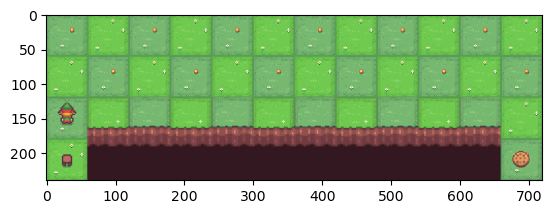

In [2]:
#gym单步行走
import gym
import pygame
import matplotlib.pyplot as plt
#导入环境
env = gym.make("CliffWalking-v0",render_mode='rgb_array')  
#初始化环境
env.reset()
#以向上走为例
obs, reward, done, _, _ = env.step(0)
#可视化
plt.imshow(env.render())
#关闭环境
env.close()

In [3]:
obs

24

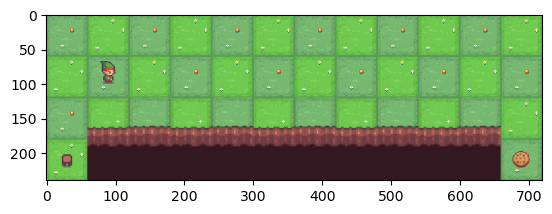

In [4]:
import gym
import pygame
import time
import matplotlib.pyplot as plt
import IPython.display as display

#规划路径的动画演示
env = gym.make("CliffWalking-v0",render_mode='rgb_array')
env.reset()
img=plt.imshow(env.render())
#以随机行走50步为例
total_reward_list = []
action_list = []
action_dic = {0:"向上走", 1:"向右走", 2:"向下走", 3:"向左走"}
reward_list = []
temp_total_reward = 0
for _ in range(50):
    action=env.action_space.sample() # 随机选择行走动作，在任务则需要根据学习到的Q值进行选择
    obs, reward, done, _, _ = env.step(action)
    temp_total_reward = temp_total_reward + reward
    action_list.append(action)
    total_reward_list.append(temp_total_reward)
    reward_list.append(reward)
    time.sleep(0.2)    #每帧动画定格0.2s
    data=env.render()
    img.set_data(data) # 刷新图片
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if done:
        break
#env.close()

In [5]:
#路径的信息显示
if done: print("finished!")
if not done: print("Not finished!")
print("规划路径为:")
for i in range(len(action_list)):
    print(f"第{i+1}步的动作为{action_dic[action_list[i]]}，奖励为{reward_list[i]}, 积累总奖励为{total_reward_list[i]}")
print(f"最终总奖励为{total_reward_list[i]}")

Not finished!
规划路径为:
第1步的动作为向右走，奖励为-100, 积累总奖励为-100
第2步的动作为向右走，奖励为-100, 积累总奖励为-200
第3步的动作为向右走，奖励为-100, 积累总奖励为-300
第4步的动作为向下走，奖励为-1, 积累总奖励为-301
第5步的动作为向左走，奖励为-1, 积累总奖励为-302
第6步的动作为向上走，奖励为-1, 积累总奖励为-303
第7步的动作为向上走，奖励为-1, 积累总奖励为-304
第8步的动作为向上走，奖励为-1, 积累总奖励为-305
第9步的动作为向左走，奖励为-1, 积累总奖励为-306
第10步的动作为向右走，奖励为-1, 积累总奖励为-307
第11步的动作为向下走，奖励为-1, 积累总奖励为-308
第12步的动作为向右走，奖励为-1, 积累总奖励为-309
第13步的动作为向下走，奖励为-1, 积累总奖励为-310
第14步的动作为向右走，奖励为-1, 积累总奖励为-311
第15步的动作为向左走，奖励为-1, 积累总奖励为-312
第16步的动作为向左走，奖励为-1, 积累总奖励为-313
第17步的动作为向下走，奖励为-100, 积累总奖励为-413
第18步的动作为向左走，奖励为-1, 积累总奖励为-414
第19步的动作为向下走，奖励为-1, 积累总奖励为-415
第20步的动作为向上走，奖励为-1, 积累总奖励为-416
第21步的动作为向下走，奖励为-1, 积累总奖励为-417
第22步的动作为向右走，奖励为-100, 积累总奖励为-517
第23步的动作为向下走，奖励为-1, 积累总奖励为-518
第24步的动作为向下走，奖励为-1, 积累总奖励为-519
第25步的动作为向上走，奖励为-1, 积累总奖励为-520
第26步的动作为向右走，奖励为-1, 积累总奖励为-521
第27步的动作为向下走，奖励为-100, 积累总奖励为-621
第28步的动作为向左走，奖励为-1, 积累总奖励为-622
第29步的动作为向下走，奖励为-1, 积累总奖励为-623
第30步的动作为向右走，奖励为-100, 积累总奖励为-723
第31步的动作为向右走，奖励为-100, 积累总奖励为-823
第32步的动作为向下走，奖励为-1, 积累总奖励为-824
第33步的动作为向上走，